In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns   
from pivottablejs import pivot_ui



# from sklearn._ import
# from scipy.stats import 
# import statsmodels.api as sm


In [8]:
nlms = pd.read_csv('data/NLMS_PublicUse_5.1/11_new.csv', index_col='record')

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [9]:
nlms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1835072 entries, 88426 to 670
Data columns (total 42 columns):
 #   Column    Dtype  
---  ------    -----  
 0   age       int64  
 1   race      float64
 2   sex       int64  
 3   ms        float64
 4   hisp      float64
 5   adjinc    float64
 6   educ      float64
 7   pob       int64  
 8   wt        int64  
 9   hhid      int64  
 10  hhnum     int64  
 11  reltrf    float64
 12  occ       float64
 13  majocc    float64
 14  ind       float64
 15  majind    float64
 16  esr       float64
 17  urban     float64
 18  smsast    float64
 19  inddea    int64  
 20  cause113  int64  
 21  follow    int64  
 22  dayod     float64
 23  hosp      float64
 24  hospd     float64
 25  ssnyn     int64  
 26  vt        float64
 27  histatus  float64
 28  hitype    float64
 29  povpct    int64  
 30  stater    int64  
 31  rcow      float64
 32  tenure    float64
 33  citizen   float64
 34  health    float64
 35  indalg    float64
 36  smok100 

In [10]:
nlms.columns

Index(['age', 'race', 'sex', 'ms', 'hisp', 'adjinc', 'educ', 'pob', 'wt',
       'hhid', 'hhnum', 'reltrf', 'occ', 'majocc', 'ind', 'majind', 'esr',
       'urban', 'smsast', 'inddea', 'cause113', 'follow', 'dayod', 'hosp',
       'hospd', 'ssnyn', 'vt', 'histatus', 'hitype', 'povpct', 'stater',
       'rcow', 'tenure', 'citizen', 'health', 'indalg', 'smok100', 'agesmk',
       'smokstat', 'smokhome', 'curruse', 'everuse'],
      dtype='object')

In [11]:
cols = ['age', 'race', 'sex', 'ms', 'hisp', 'adjinc', 'educ', 'pob',
       'wt', 'hhid', 'hhnum', 'reltrf', 'occ', 'majocc', 'ind', 'majind',
       'esr', 'urban', 'smsast', 'inddea', 'cause113', 'follow', 'dayod',
       'hosp', 'hospd', 'ssnyn', 'vt', 'histatus', 'hitype', 'povpct',
       'stater', 'rcow', 'tenure', 'citizen', 'health', 'indalg', 'smok100',
       'agesmk', 'smokstat', 'smokhome', 'curruse', 'everuse']

index = record number<br>
age = age at time of interview<br>
race = race<br>
sex = gender<br>
ms = marital status<br>
hisp = hispanic<br>
adjinc = inflation adjusted income<br>
educ = highest grade completed<br>
pob = region of birth<br>
wt = adjusted weight<br>
hhid = household ID number<br>
hhnum = number of people in household<br>
reltrf = relationship to reference person<br>
occ = 4 digit occupation code<br>
majocc = major occupation code<br>
ind = 4 digit industry code<br>
majind = major industry code<br>
esr = employment status recode<br>
urban = urban / rural status<br>
smsast = SMSAST status<br>
inddea = death indicator<br>
cause113 = cause of death<br>
follow = length of follow-up<br>
dayod = day of week of death<br>
hosp = hospital type<br>
hosppd = hospital death indicator<br>
ssnyn = presence of ssn<br>
vt = veteran status<br>
histatus = health insurance status<br>
hitype = health insurance type<br>
povpct = income as percent of povery level<br>
stater = state recode<br>
rcow = recoded class of worker<br>
tenure = housing tenure<br>
citizen = citizenship<br>
health = health<br>
indalg = indicator of algorithmic death<br>
smok100 = smoked more than 100 cigarettes<br>
agesmk = age started smoking<br>
smokstat = cigarette smoking status<br>
smokhome = rules for smoking cigarettes in the home<br>
curruse = currently use smokeless tobacco<br>
everuse = ever use smokeless tobacco<br>

In [12]:
nlms.head()

,age,race,sex,ms,hisp,adjinc,educ,pob,wt,hhid,...,tenure,citizen,health,indalg,smok100,agesmk,smokstat,smokhome,curruse,everuse
record,,,,,,,,,,,,,,,,,,,,,
88426,70,1.0,2,5.0,3.0,11.0,4.0,909,151,1,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
88427,79,1.0,2,2.0,3.0,11.0,4.0,909,132,1,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88428,34,1.0,1,1.0,3.0,8.0,4.0,909,155,2,...,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
88429,32,1.0,2,1.0,3.0,8.0,1.0,0,155,2,...,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
88430,2,1.0,2,NaN,3.0,8.0,NaN,909,145,2,...,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
nlms.shape

(1835072, 42)

In [20]:
nlms.isna().sum()

age               0
race           2890
sex               0
ms           361226
hisp          52502
adjinc        44269
educ         350870
pob               0
wt                0
hhid              0
hhnum             0
reltrf         4674
occ          855325
majocc       855325
ind          855546
majind       855546
esr          350903
urban         13042
smsast        13056
inddea            0
cause113          0
follow            0
dayod       1674322
hosp        1677278
hospd       1689898
ssnyn             0
vt           396051
histatus     577765
hitype       577765
povpct            0
stater            0
rcow         853710
tenure        25447
citizen     1370211
health      1450943
indalg      1486313
smok100     1835072
agesmk      1835072
smokstat    1835072
smokhome    1835072
curruse     1835072
everuse     1835072
dtype: int64

<AxesSubplot:xlabel='stater', ylabel='Count'>

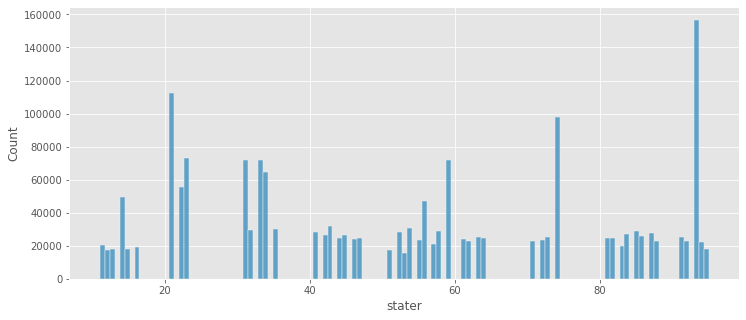

In [25]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(x='stater', data=nlms)

In [27]:
nlms.stater.value_counts()

93    156662
21    112251
74     97955
23     73046
31     72188
33     72060
59     71730
34     64501
22     55593
14     49232
56     47083
43     32123
54     30580
35     30160
32     29361
85     29005
58     28996
41     28142
52     28063
87     27678
84     26866
45     26529
42     26261
86     25990
91     25179
63     25133
73     25119
64     24935
82     24825
44     24725
47     24494
81     24455
61     24261
46     24046
55     23382
72     23352
62     23179
92     23161
71     22904
88     22683
94     22027
57     21318
11     20737
83     19826
16     19202
95     18289
15     17866
13     17813
12     17355
51     17284
53     15467
Name: stater, dtype: int64

In [30]:
sixa = pd.read_csv('data/NLMS_PublicUse_5.1/6a_new.csv', index_col='record')

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [31]:
sixb = pd.read_csv('data/NLMS_PublicUse_5.1/6b_new.csv', index_col='record')

In [32]:
sixc = pd.read_csv('data/NLMS_PublicUse_5.1/6c_new.csv', index_col='record')

In [33]:
tu = pd.read_csv('data/NLMS_PublicUse_5.1/tu_new.csv', index_col='record')

In [81]:
tu.tail()

,age,race,sex,ms,hisp,adjinc,educ,pob,wt,hhid,...,tenure,citizen,health,indalg,smok100,agesmk,smokstat,smokhome,curruse,everuse
record,,,,,,,,,,,,,,,,,,,,,
174791,48,1.0,2,1.0,2.0,12.0,8.0,111,135.0,268754,...,1.0,2.0,4.0,NaN,1,22.0,4.0,3.0,22222.0,22222.0
174792,49,1.0,1,1.0,2.0,12.0,8.0,960,143.0,268754,...,1.0,1.0,3.0,NaN,1,16.0,2.0,3.0,22222.0,22222.0
174793,28,1.0,1,4.0,2.0,12.0,11.0,111,219.0,268754,...,1.0,2.0,2.0,NaN,2,NaN,1.0,NaN,22222.0,22222.0
174794,27,1.0,2,1.0,3.0,11.0,8.0,960,354.0,268755,...,1.0,1.0,2.0,NaN,2,NaN,1.0,1.0,22222.0,22222.0
174795,35,1.0,1,1.0,3.0,11.0,8.0,960,373.0,268755,...,1.0,1.0,2.0,NaN,2,NaN,1.0,1.0,22222.0,22222.0


In [75]:
tu.dayod.count()

20153

In [84]:
dec_tu = tu[tu.dayod.isin([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])]

In [86]:
dec_tu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20153 entries, 243252 to 174770
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       20153 non-null  int64  
 1   race      20153 non-null  float64
 2   sex       20153 non-null  int64  
 3   ms        20146 non-null  float64
 4   hisp      19606 non-null  float64
 5   adjinc    19928 non-null  float64
 6   educ      20143 non-null  float64
 7   pob       20153 non-null  int64  
 8   wt        20146 non-null  float64
 9   hhid      20153 non-null  int64  
 10  hhnum     20153 non-null  int64  
 11  reltrf    20153 non-null  int64  
 12  occ       4327 non-null   float64
 13  majocc    4327 non-null   float64
 14  ind       4328 non-null   float64
 15  majind    4328 non-null   float64
 16  esr       20136 non-null  float64
 17  urban     0 non-null      float64
 18  smsast    0 non-null      float64
 19  inddea    20153 non-null  int64  
 20  cause113  20153 non-nu

In [71]:
dec = nlms[nlms.dayod.isin([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])]


In [72]:
dec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160750 entries, 88427 to 670
Data columns (total 42 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   age       160750 non-null  int64  
 1   race      160536 non-null  float64
 2   sex       160750 non-null  int64  
 3   ms        159106 non-null  float64
 4   hisp      156540 non-null  float64
 5   adjinc    157132 non-null  float64
 6   educ      159210 non-null  float64
 7   pob       160750 non-null  int64  
 8   wt        160750 non-null  int64  
 9   hhid      160750 non-null  int64  
 10  hhnum     160750 non-null  int64  
 11  reltrf    160513 non-null  float64
 12  occ       45318 non-null   float64
 13  majocc    45318 non-null   float64
 14  ind       45306 non-null   float64
 15  majind    45306 non-null   float64
 16  esr       159237 non-null  float64
 17  urban     160575 non-null  float64
 18  smsast    160575 non-null  float64
 19  inddea    160750 non-null  int64  
 20  cau

In [73]:
len(dec.stater.unique())

51